# Makeover Monday | 2026 W5 Gold Prices

The data for this weeks Makeover Monday was a good one as we were actually discussing **the price of gold** at a birthday party the weekend before. The data was compiled by [BullionVault](https://www.bullionvault.com/gold-price-chart.do) and prepared by the [Makeover Monday](https://makeovermonday.co.uk/) team as part of the 2026 week 5 challenge. This data shows us the "price of gold in the professional gold bullion market".
The explanation of the data is the "Monthly Gold Prices over the last 20 years from BullionVault" - so we should expect one value per month for the last 20 years.
 * **Data Source Link** : https://www.bullionvault.com/gold-price-chart.do
 * **Compiled Data** (*published by Makeover Monday*) : https://data.world/makeovermonday/2025w5-gold-prices


In [ ]:
import pandas as pd
import pandas_gbq
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Required for date formatting
import seaborn as sns

In [ ]:
df = pd.read_csv('https://query.data.world/s/5zxlplt6shkbdhf42er7ncenfvzlqk?dws=00000')

# Exploratory Data Analysis

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,240,240,2026-01-07 0:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High (kg),240.0,NaN,NaN,NaN,50852.989125,22803.640945,19512.84,39336.08,43938.86,58907.4425,179874.43
Low (kg),240.0,NaN,NaN,NaN,47178.154333,20571.82232,17459.47,36753.0275,41617.575,55346.3025,141589.72
Close (kg),240.0,NaN,NaN,NaN,49152.643208,21835.337008,18600.68,38104.545,42852.48,57152.3325,152284.58


In [ ]:
df['Date'].min()

'2006-05-22 0:00'

In [ ]:
df.dtypes

,0
Date,object
High (kg),float64
Low (kg),float64
Close (kg),float64


The max/top  date is 1/7/2026 and the "earliest"/min date appears to be 2006 - but the Date field is an object - so we should convert that to a date or date time field to really ensure we can do any time series.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
date_range = df['Date'].max() - df['Date'].min()
print(date_range)

7170 days 00:00:00


In [ ]:
df['year'] = df['Date'].dt.year
year_range = df['year'].max() - df['year'].min()
print(year_range)

20


In [ ]:
df.head(5)

,Date,High (kg),Low (kg),Close (kg),year
0,2026-01-07,179874.43,141589.72,152284.58,2026
1,2025-12-08,146277.46,134093.76,144461.74,2025
2,2025-11-08,137102.36,128547.85,135080.00,2025
3,2025-10-09,140854.19,124968.25,128612.63,2025
4,2025-09-09,130502.85,116212.39,129012.99,2025


I am spot checking these values against the exact values on https://www.bullionvault.com/gold-price-chart.do when set the option to "High-Low-Close".

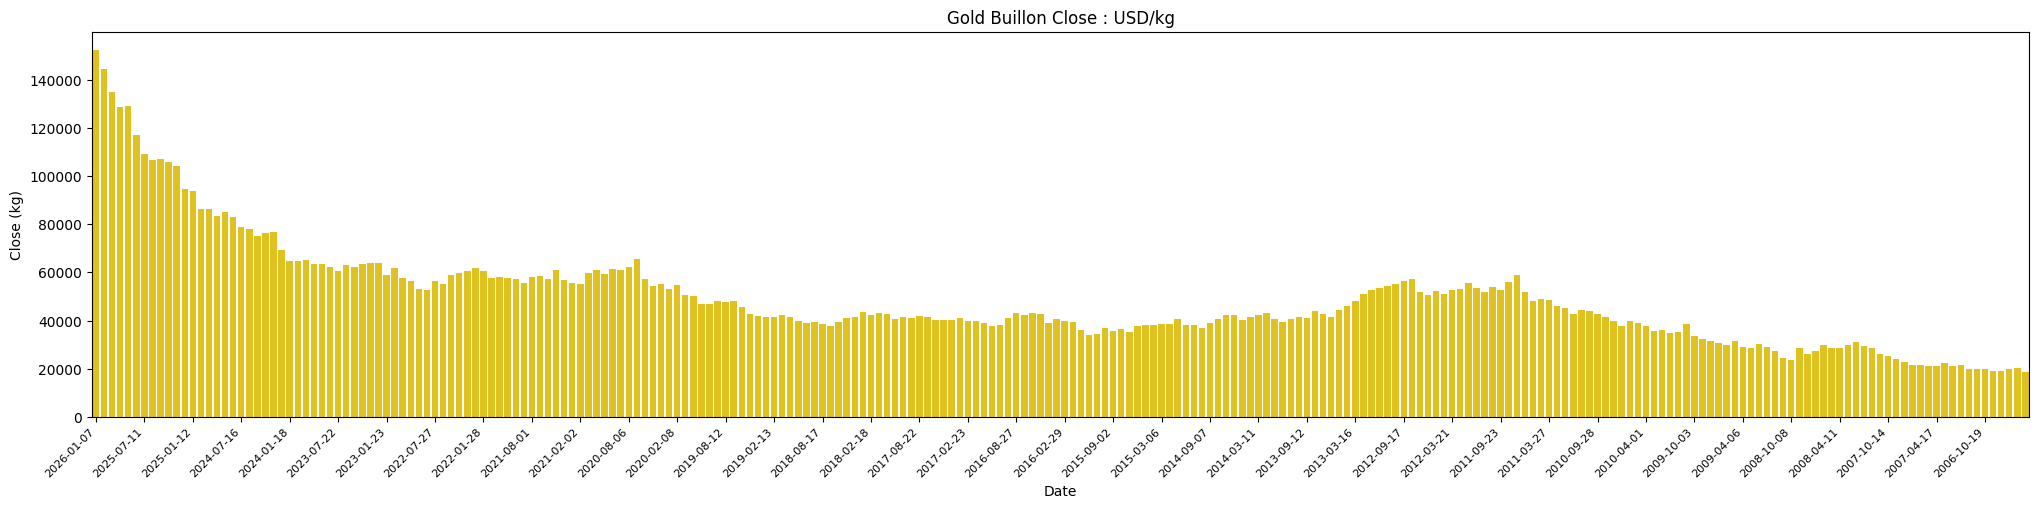

In [ ]:
## plot the Close KG
fig, ax = plt.subplots(figsize=(25, 5))
sns.barplot(df,x='Date',y='Close (kg)',ax=ax, color = 'gold')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) ## many dates and they overlap
plt.title("Gold Buillon Close : USD/kg")
ax.set_xticks(ax.get_xticks()[::6]) # show only every n xtick
plt.xticks(rotation=45, ha='right', fontsize = 8)
plt.show()

Unfotunately because the low and the high are seperate columns and not just a category with a numerical value, I cant plot both on the same chart without doing a melt - which I will probably do but below you can see the shape of highs and low, with the high leading a low for the most part. One thing to note when looking at these two is that hey are not on the same scale.

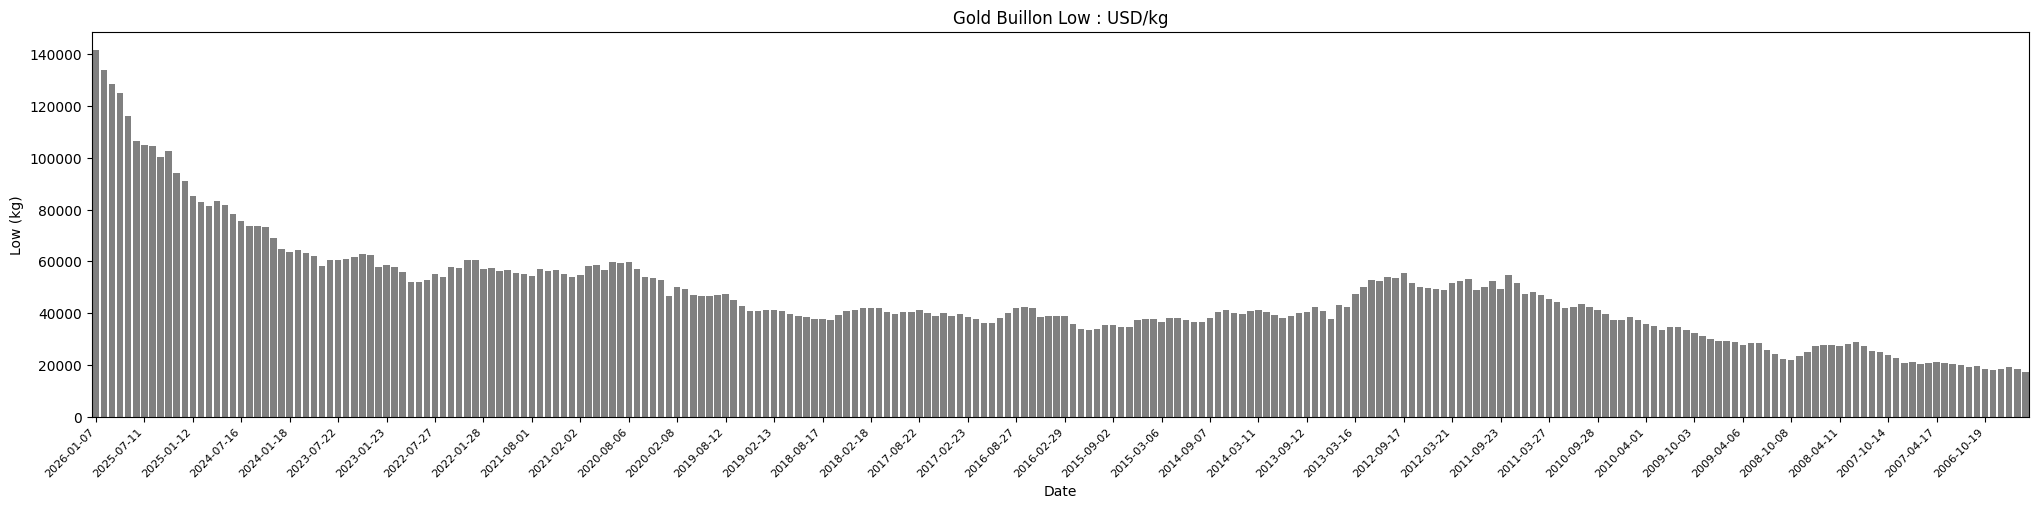

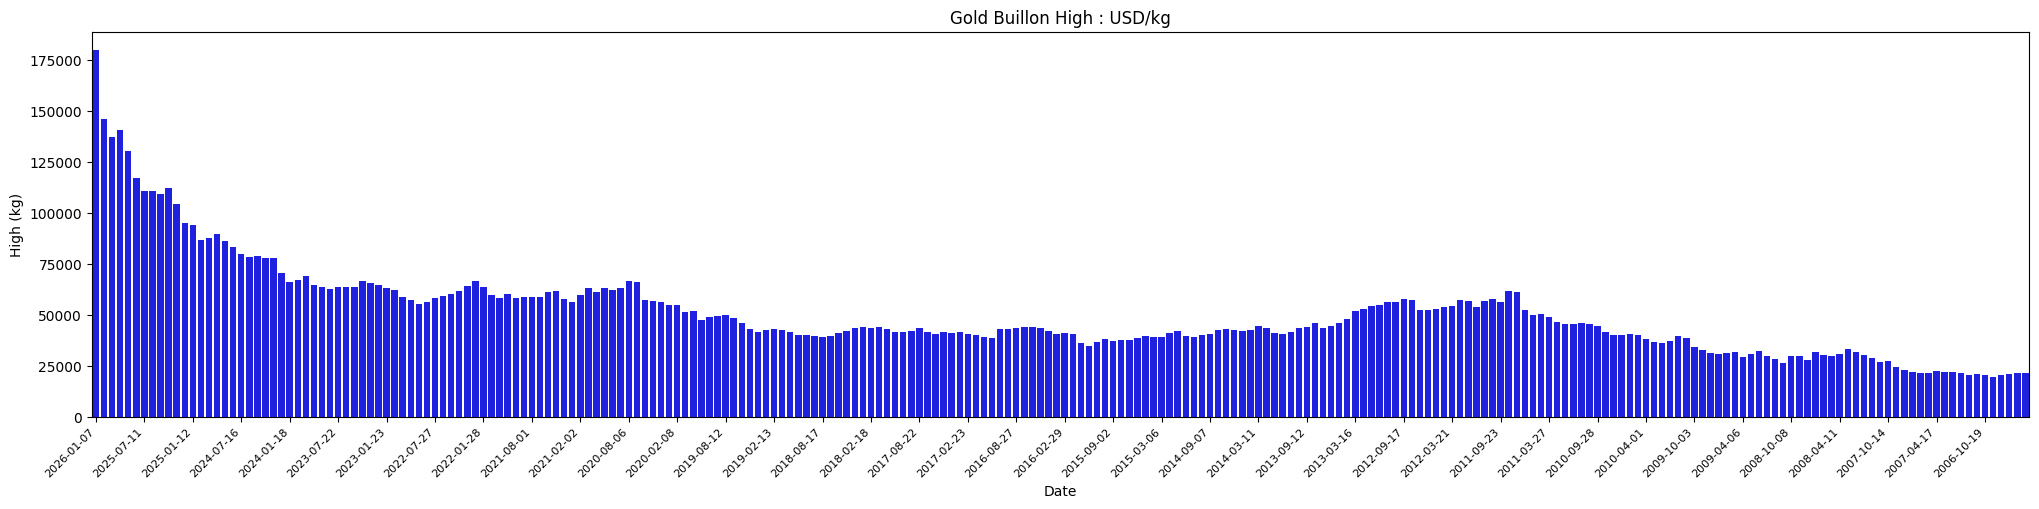

In [ ]:
## plot the High and Low KG
fig, ax = plt.subplots(figsize=(25, 5))
sns.barplot(df,x='Date',y='Low (kg)',ax=ax, color = 'grey')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) ## many dates and they overlap
plt.title("Gold Buillon Low : USD/kg")
ax.set_xticks(ax.get_xticks()[::6]) # show only every n xtick
plt.xticks(rotation=45, ha='right', fontsize = 8)
plt.show(),
fig, ax = plt.subplots(figsize=(25, 5))
sns.barplot(df,x='Date',y='High (kg)',ax=ax, color = 'blue')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) ## many dates and they overlap
plt.title("Gold Buillon High : USD/kg")
ax.set_xticks(ax.get_xticks()[::6]) # show only every n xtick
plt.xticks(rotation=45, ha='right', fontsize = 8)
plt.show()

We have this column "Close (kg)" which is assoicated with the month - but the "date" associated with it is not the last day of the month (interestingly) so I wanted to see the distribution of days were accross the months and you can see that its pretty random. This makes me thing that these are just "snapshots" of the DAYS High, Low and Close for the DAY given (but I could be wrong). I will asusme this moving forward.

In [ ]:
day_of_month = df['Date'].dt.day
days_distribution = day_of_month.value_counts()
days_distribution

,count
Date,
11,11
16,10
14,10
18,9
17,9
13,9
20,9
19,9
12,8


# Plan for Tableau Viz:
*Percentage Change Chart with Jump Plots exploring the cycles of increases and decreases for Gold**

My plan for the Tableau viz will include a view that is pretty simple and actually look quite similar to the high-low-close viz that is published to BuillonVault.com to show the actual values and then I will enrhich that view with another view that shows the monthly percentage changes (colored by positive and negative percentage changes) with jump plots that highlight the cycles of upward or downward trend in gold values.
Jump plots in [learningtableaublog](https://learningtableaublog.wordpress.com/2016/07/13/jump-plots/) are pretty old - and this is the tutorial from Christ Demartini and Tom Van Buskirk that I am taking reference from that was published by Tableau many years ago.

In order to do this, I will need to melt my data, get the values all in one field with a high, low, close indicator, as well as cleanup the names to be compataible with BigQuery.
Then I will jump over to SQL and do the heavy lifting on calculations.

## Data Processing

In [ ]:
#clean up the column names to snake_case
df_1 = df.copy()
df_1.columns = (
    df.columns
      .astype(str)
      .str.strip()
      .str.replace(r"\s+", "_", regex=True)
      .str.replace(r"\(|\)", "", regex=True)
      .str.lower()
)

df_1

,date,high_kg,low_kg,close_kg,year
0,2026-01-07,179874.43,141589.72,152284.58,2026
1,2025-12-08,146277.46,134093.76,144461.74,2025
2,2025-11-08,137102.36,128547.85,135080.00,2025
3,2025-10-09,140854.19,124968.25,128612.63,2025
4,2025-09-09,130502.85,116212.39,129012.99,2025
...,...,...,...,...,...
235,2006-09-19,19512.84,18005.21,19041.14,2006
236,2006-08-20,20592.86,18360.97,18899.88,2006
237,2006-07-21,21104.28,19382.47,19710.00,2006
238,2006-06-21,21749.27,18362.89,20171.41,2006


In [ ]:
df_long = df_1.melt(
    id_vars='date',
    value_vars=['high_kg','low_kg','close_kg'],
    var_name='type',
    value_name='value_kg')

df_long

,date,type,value_kg
0,2026-01-07,high_kg,179874.43
1,2025-12-08,high_kg,146277.46
2,2025-11-08,high_kg,137102.36
3,2025-10-09,high_kg,140854.19
4,2025-09-09,high_kg,130502.85
...,...,...,...
715,2006-09-19,close_kg,19041.14
716,2006-08-20,close_kg,18899.88
717,2006-07-21,close_kg,19710.00
718,2006-06-21,close_kg,20171.41


# Save to BigQuery Table
Save the df_long to a dedicated table in my BigQuery warehouse which I will then use with Connected Sheets to connect to Tableau Public.

In [ ]:
#convert the df to target table in bigquery dataet
UPLOAD_TO_BQ = False # set True when you actually want to write tables

if UPLOAD_TO_BQ:
  project_id = 'data-projects-478723' #'your_project_id'
  destination_table = 'makeover_monday.gold_buillonvault' #'your_dataset.another_new_table'

  pandas_gbq.to_gbq(
      dataframe=df_long,
      destination_table=destination_table,
      project_id=project_id,
      if_exists='replace' ## 'if_exists' options: 'fail', 'replace', 'append'
  )

100%|██████████| 1/1 [00:00<00:00, 12633.45it/s]


# SQL Query to get the Final Data

# Tableau Dashboard